# Outlier and its impact on Machine learning

### which machine learning is models are sensitive to outlier?
1. Naiye bayes classifier---- NOT
2. svm----------------------- NOT
3. Logistic regression------- IMPACT
4. Linear regression--------- IMPACT
5. Decision Tree------------- NOT
6. Ensemble (RF, xgboost, Gb)---- NOT
7. KNN--------------------------- NOT
8. Kmean------------------------- IMPACT
9. Hierarchal-------------------- IMPACT
10. PCA-------------------------- MOST IMPACT--when there are outlier and try to minimize the dim,                                                    always focus on the variance , how much going to                                                      capture, if we have more outlier whole variance not                                                    going to capture 
11. Neural Networks-------------- IMPACT
12. DBSACN----------------------- IMPACT

13. ALL unsupervise technique are impact by outliers

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
path = "C:/Users/DEVENDRA/Desktop/ml_database_7/titanic/train.csv"
df = pd.read_csv(path)

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df['Age'].isnull().sum()

177

C:\Users\DEVENDRA\Anaconda3\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


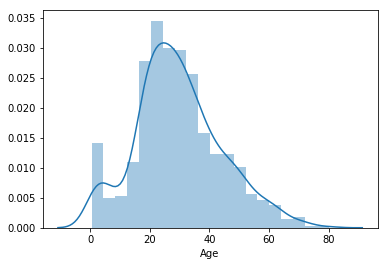

In [7]:
sns.distplot(df['Age'].dropna())

C:\Users\DEVENDRA\Anaconda3\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


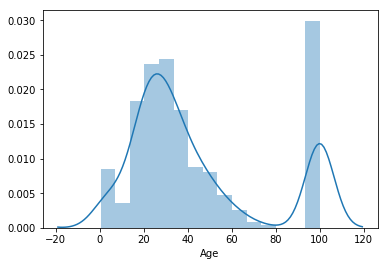

In [8]:
sns.distplot(df['Age'].fillna(100))

### Guassian distributes..

Text(0,0.5,'No OF passenger')

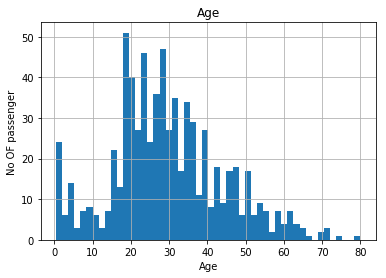

In [9]:
fig = df.Age.hist(bins=50)
fig.set_title('Age')
fig.set_xlabel ('Age')
fig.set_ylabel('No OF passenger')


# this is a guassian deistribution

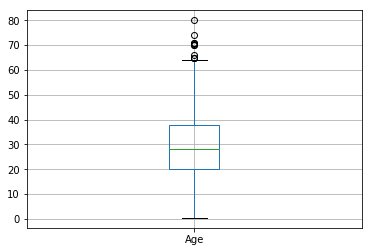

In [11]:
fig = df.boxplot(column = 'Age')

In [12]:
df.Age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [15]:
### Assum age follow guassian distibution and ,we will calculate the boundries which differentiate the outlier
### in 3rd std 99.7% data will captured
upper_bound = df.Age.mean() + 3*df.Age.std()
lower_bound = df.Age.mean() - 3*df.Age.std()
print("lower_boundry", lower_bound)
print("upper_boundry", upper_bound)

lower_boundry -13.88037434994331
upper_boundry 73.27860964406095


In [33]:
data = df.copy()
data.loc[data['Age']>=75, 'Age']=73

Text(0,0.5,'No OF Fare')

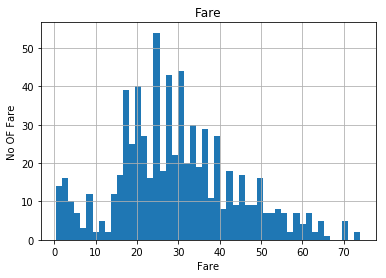

In [38]:
fig = data.Age.hist(bins=50)
fig.set_title('Fare')
fig.set_xlabel ('Fare')
fig.set_ylabel('No OF Fare')

# this is a righ skewed deistribution

In [35]:
# data.head()

### If Feature Are Skewed We use this technque

Text(0,0.5,'No OF Fare')

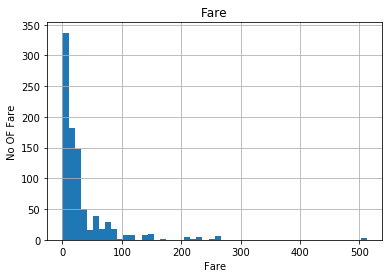

In [22]:
fig = df.Fare.hist(bins=50)
fig.set_title('Fare')
fig.set_xlabel ('Fare')
fig.set_ylabel('No OF Fare')

# this is a righ skewed deistribution

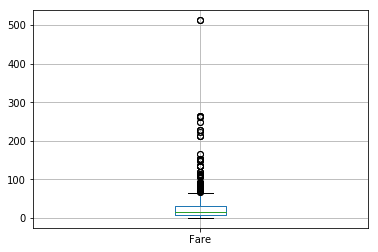

In [23]:
fig = df.boxplot(column = 'Fare')

In [24]:
df.Fare.describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [27]:
### Lets compute the inter-Quartile range to calculate the boundaries
### IQR calculate the difference between 75%ile and 25%ile
IQR = df.Fare.quantile(0.75)- df.Fare.quantile(0.25)
print(IQR)

23.0896


In [28]:
lower_bridge = df['Fare'].quantile(0.25) - (IQR*1.5)
upper_bridge = df['Fare'].quantile(0.75) + (IQR*1.5)
print("lower_bound", lower_bridge)
print("upper_bound", upper_bridge)

lower_bound -26.724
upper_bound 65.6344


In [29]:
### Extreme Outlier
lower_bridge = df['Fare'].quantile(0.25) - (IQR*3)
upper_bridge = df['Fare'].quantile(0.75) + (IQR*3)
print("lower_bound", lower_bridge)
print("upper_bound", upper_bridge)

lower_bound -61.358399999999996
upper_bound 100.2688


In [36]:
data.loc[data['Fare']>=100,'Fare']=100

Text(0,0.5,'No OF Fare')

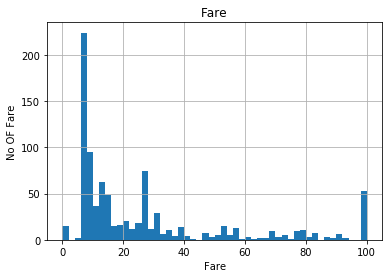

In [37]:
fig = data.Fare.hist(bins=50)
fig.set_title('Fare')
fig.set_xlabel ('Fare')
fig.set_ylabel('No OF Fare')

# this is a righ skewed deistribution

In [44]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data[['Age','Fare']].fillna(0),data['Survived'], test_size = 0.2)

In [45]:
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression()
lg.fit(x_train,y_train)
y_pred = lg.predict(x_test)
y_pred1 = lg.predict_proba(x_test)

from sklearn.metrics import accuracy_score,roc_auc_score
print("Accuracy score:{}".format(accuracy_score(y_test, y_pred)) )
print("roc_auc score:{}".format(roc_auc_score(y_test, y_pred1[:,1])))

Accuracy score:0.6759776536312849
roc_auc score:0.7166130329847145


In [46]:
from sklearn.ensemble import RandomForestClassifier
lg = RandomForestClassifier()
lg.fit(x_train,y_train)
y_pred = lg.predict(x_test)
y_pred1 = lg.predict_proba(x_test)

from sklearn.metrics import accuracy_score,roc_auc_score
print("Accuracy score:{}".format(accuracy_score(y_test, y_pred)) )
print("roc_auc score:{}".format(roc_auc_score(y_test, y_pred1[:,1])))

Accuracy score:0.6424581005586593
roc_auc score:0.6902654867256638
